In [1]:
import tensorflow_datasets as tfds

import librosa
import librosa.display

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"Tensorflow datasets: {tfds.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

Tensorflow datasets: 4.2.0
Librosa: 0.8.0
Numpy: 1.19.5
Matplotlib: 3.4.1


In [3]:
import pump

data_dir = "../dataset"

(train, test), info = tfds.load("pump", split=["train", "test"], data_dir=data_dir, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]
Dl Completed...: 0 url [00:00, ? url/s]
Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Dataset pump downloaded and prepared to ../dataset\pump\1.0.0. Subsequent calls will reuse this data.


In [7]:
tfds.as_dataframe(train.take(1), info)

audio audio/id audio/machine  \
0  [-414, -319, -142, -207, -265, -95, -135, -259...  b'0028'         b'00'   

   audio/split  label  
0            0      0

In [5]:
def print_plot(audio_sample, color):
    y = list(audio_sample)[0]["audio"].numpy() / 2**15
    sr = 16000

    fig, ax = plt.subplots(1, 4, figsize=(24, 2))

    librosa.display.waveplot(y, sr=sr, ax=ax[0], color=color)
    ax[0].set(title=f"Waveplot")

    S = np.abs(librosa.stft(y))
    D = librosa.amplitude_to_db(S, ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[1])
    ax[1].set(title=f"Linear-frequency power spectrogram")
    fig.colorbar(img, ax=ax[1], format='%+2.0f dB')

    img = librosa.display.specshow(D, y_axis='log', sr=sr, x_axis='time', ax=ax[2])
    ax[2].set(title='Log-frequency power spectrogram')
    fig.colorbar(img, ax=ax[2], format='%+2.0f dB')  

    M = librosa.feature.melspectrogram(S=S**2)
    M_db = librosa.power_to_db(M, ref=np.max)
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax[3])
    ax[3].set(title=f"Mel spectrogram")
    fig.colorbar(img, ax=ax[3], format='%+2.0f dB')
    # plt.show()

audio audio/id audio/machine  \
0  [-696, -688, -882, -650, -577, -487, -29, 84, ...  b'0015'         b'00'   
1  [-96, -168, -199, 76, 65, 57, 234, 174, 236, 3...  b'0009'         b'00'   
2  [-1220, -1555, -1632, -1554, -1190, -845, -990...  b'0014'         b'00'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

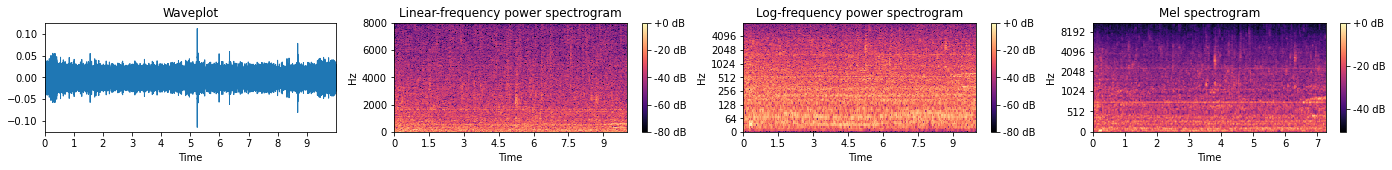

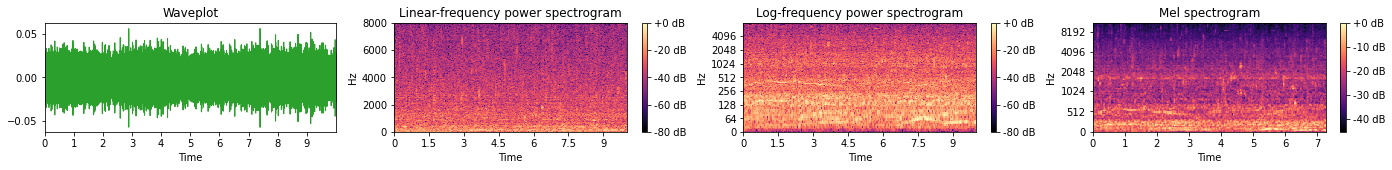

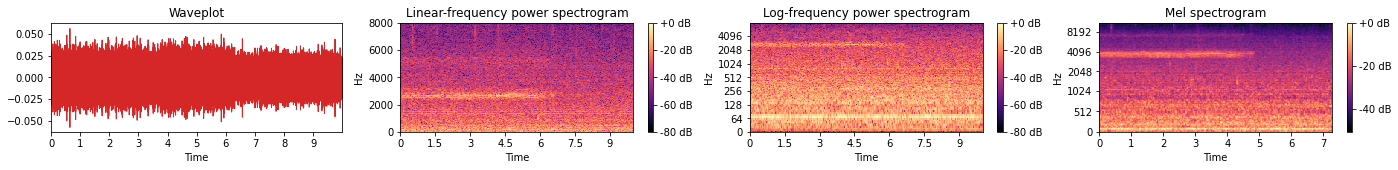

In [8]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0)

machine_id = "00"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 